In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pylab as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# 查看训练集的形状
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

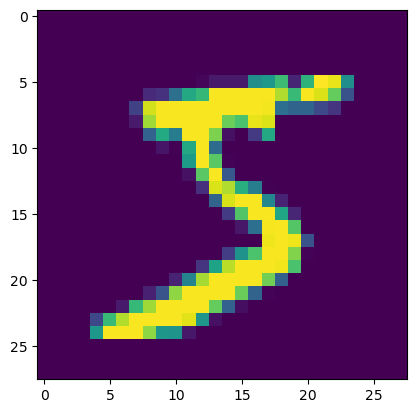

In [4]:
# 显示第0个样本对应的图片
plt.imshow(x_train[0])

In [5]:
# 显示第0个样本对应的数字
y_train[0]

5

In [6]:
# 定义CNN的输入层和输出层
# 输入层
input_shape = (28, 28, 1)

# 输出层
num_classes = 10

In [7]:
# 数据标准化处理，将原灰度级别取值范围[0, 255]缩放至区间[0, 1]
# 将图像的灰度值缩放至区间[0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# 显示标准化处理后的训练集、测试集的形状
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
# 将通道信息加入数据集，即将数据形状改为（28,28,1)。因为输入层定义的形状为（28,28,1)，所以需要将数据的形状也改为(28,28,1)，即增加一个颜色的维度。
# 调用函数np.expand_disms()增加维数
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [10]:
# 输出y_train
print(x_test.shape[0], "test samples")

10000 test samples


In [11]:
# 对训练集中标签进行独热编码
y_train = keras.utils.to_categorical(y_train, num_classes)

# 对测试集中标签进行独热编码
y_test = keras.utils.to_categorical(y_test, num_classes)

# 显示训练集的标签y_train
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
# 对数据x_train,x_test进行探索性分析
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
# 模型构建
num_filters_1 = 32  # 过滤器数量1
num_filters_2 = 64  # 过滤器数量2
kernel_size = (3, 3)  # 卷积核的大小
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        # 卷积层
        layers.Conv2D(num_filters_1, kernel_size, strides=1, padding='valid', activation='relu', use_bias=True,
                      bias_initializer=keras.initializers.zeros()),

        # 池化层
        layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),

        # 第二次卷积池化过程
        layers.Conv2D(num_filters_2, kernel_size, strides=1, padding='valid', activation='relu'),

        layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),

        # 扁平化输出
        keras.layers.Flatten(),

        # dropput层
        keras.layers.Dropout(rate=0.5),

        # 全连接层
        keras.layers.Dense(units=num_classes, activation='softmax'),
    ]
)

# 显示训练结果信息
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 训练模型

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 批（batch）大小
batch_size = 128
epochs = 10

reslut = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7636 - loss: 0.7676 - val_accuracy: 0.9762 - val_loss: 0.0923
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9606 - loss: 0.1306 - val_accuracy: 0.9828 - val_loss: 0.0632
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9722 - loss: 0.0880 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9771 - loss: 0.0758 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9781 - loss: 0.0697 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9820 - loss: 0.0568 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9834 - loss: 0.0530 - val_accuracy: 0.9903 - val_loss: 0.0345
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9849 - loss: 0.0475 - val_accu

In [15]:
# 评价方法
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(score)

Test loss: 0.028587689623236656
Test accuracy: 0.989799976348877
[0.028587689623236656, 0.989799976348877]


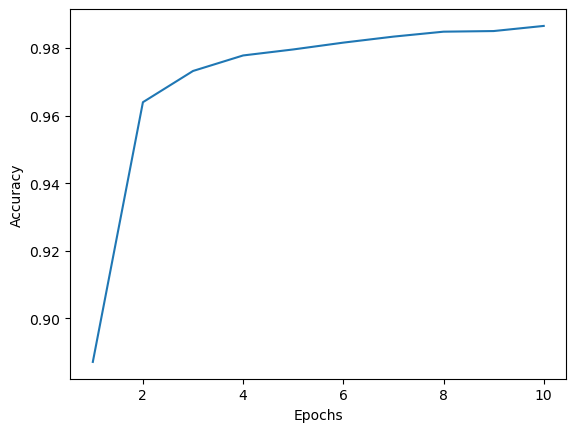

In [16]:
plt.plot(range(1, epochs + 1), reslut.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [17]:
# 预测测试集的第1个样本的输出
predictions = model.predict(x_test[:1])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[1.0635075e-09 2.7294850e-10 1.4616217e-05 9.7604679e-06 5.6025188e-13
  4.2462575e-10 6.7716161e-17 9.9997532e-01 1.9321922e-08 1.8540615e-07]]


In [18]:
# 显示预测标签结果
np.argmax(predictions[0])

7